# Analysis of Traffic Intensity on Westbound I-94

In this guided project, we will be using the 
[Metro Interstate Traffic Volume Data Set](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) to provide some analysis of traffic on I-94. Our goal is to determine a few indicators that may lead to increased traffic on the interstate. 

The data was collected by station located on I-94 between Minneapolis and Saint Paul, Minnesota. It's important to note that the station only records westbound traffic.


Here are the variables included in the data set:

 - `holiday` Categorical US National holidays plus regional holiday, Minnesota State Fair
 - `temp` Numeric Average temp in kelvin
 - `rain_1h` Numeric Amount in mm of rain that occurred in the hour
 - `snow_1h` Numeric Amount in mm of snow that occurred in the hour
 - `clouds_all` Numeric Percentage of cloud cover
 - `weather_main` Categorical Short textual description of the current weather
 - `weather_description` Categorical Longer textual description of the current weather
 - `date_time` DateTime Hour of the data collected in local CST time
 - `traffic_volume` Numeric Hourly I-94 ATR 301 reported westbound traffic volume

Let's import our libraries, open the dataset, and take a look!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
traffic=pd.read_csv(r"~\Downloads\Metro_Interstate_Traffic_Volume.csv")
traffic.head()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


When we look at the info about the variables, we find that our data set is looking pretty clean. All entries are accounted for, so we won't need to do much cleaning of the data for this project. Also, note that the data types are already in integer or float format, besides the `weather_main`, `weather_description`, and `date_time` variables, which contain strings.

## Exploring Traffic Volume

To begin, we'll look at the dependant variable in our analysis, `traffic_volume`. Let's plot a histagram, which will show us the frequency of traffic volumes across 10 equal ranges. We'll also use the `Series.describe()` method to look at some of the statistics for the column.

<AxesSubplot:ylabel='Frequency'>

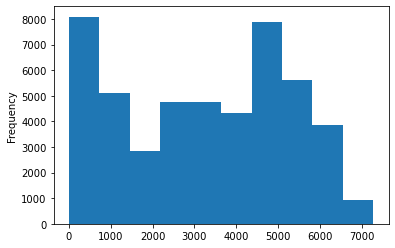

In [3]:
#using matplotlib to plot a histagram for the traffic_volume column
traffic['traffic_volume'].plot.hist()

In [4]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Looking at the histogram, the two most common traffic volumes are in the approximate ranges of 0-500 cars and 4500-5000 cars. Likely the 0-500 range was measured overnight, when most people are sleeping, while the 4500-5000 range is measured during the daily 'rush-hour' for the area. There are a few times where traffic is abnormally bad (the maximum volume is 7280 cars) which may take place on holidays.

## Traffic Volume, Day vs. Night

Let's use the `date_time` variable to check whether there's any patterns in the traffic volume between day and night. If our hypothesis is true, there would be less traffic overnight compared to during the day. 

First, we'll need to convert the data in `date_time` from `object` to `datetime` format.

In [5]:
#using pd.to_datetime to change the dtype from 'object' to 'datetime64'
traffic['date_time']=pd.to_datetime(traffic['date_time'], format='%Y-%m-%d %H:%M:%S')
#running dataframe.info() to confirm the dtype for 'date_time' is, in fact, datetime
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


Now that our `date_time` column has the correct dtype, we'll create two dataframes. The `daytime` dataframe contains data from 7am - 7pm and the `nighttime` dataframe contains data from 7pm-7am. We'll run `value_counts()` to create a frequency table for the hour value in the `date_time` column for each dataframe.

In [6]:
#separting the data daytime/nighttime data
daytime=traffic[((traffic['date_time'].dt.hour)>=7)&((traffic['date_time'].dt.hour)<19)].copy()
nighttime=traffic[((traffic['date_time'].dt.hour)>=19)|((traffic['date_time'].dt.hour)<7)].copy()


#running value_counts() to double check the hours fall in the range we wanted
daytime['date_time'].dt.hour.value_counts().sort_index()

7     2079
8     2080
9     2018
10    2078
11    1952
12    1955
13    1905
14    1969
15    1934
16    1988
17    1933
18    1986
Name: date_time, dtype: int64

In [7]:
#doing the same for the nighttime data
nighttime['date_time'].dt.hour.value_counts().sort_index()

0     2037
1     2049
2     2019
3     2025
4     2091
5     2063
6     2087
19    1961
20    1979
21    1982
22    1994
23    2040
Name: date_time, dtype: int64

Great, it look like all hours are accounted for between both dataframes, next we can move on to some analysis.

## Analyzing Traffic Volume: Day vs Night

Now that we have our data separated into Day and Night, let's look at the `traffic_volume` values to see if there's any interesting patterns.

To begin, we'll create histograms for day and night to show us the most common traffic volumes for each hour range.

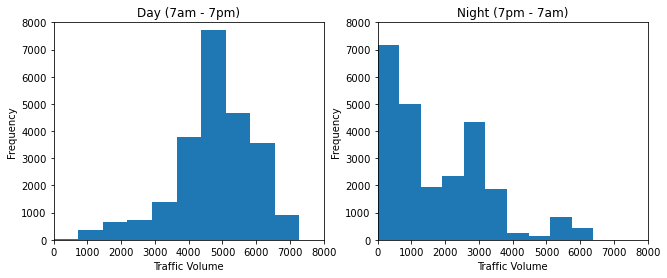

In [8]:
plt.subplot(1,2,1)
daytime['traffic_volume'].plot.hist()
plt.title('Day (7am - 7pm)')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim([0,8000])
plt.ylim([0,8000])

plt.subplot(1,2,2)
nighttime['traffic_volume'].plot.hist()
plt.title('Night (7pm - 7am)')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim([0,8000])
plt.ylim([0,8000])

plt.subplots_adjust(right=1.5)
plt.show()

Judging by these histograms, it seems like our original theory may be correct. Given the histogram for night, the most common traffic volume is 0-500 cars, while the histogram for day shows us the most common traffic volume is closer to 4500-5000 cars. At night, its more common to have less traffic compared to during the day.

Let's take a closer look at some of the summary statistics for our day and night data.

In [9]:
daytime['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [10]:
nighttime['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

As we can see, the mean traffic volume for night is significantly lower compared to day! To find indicators of heavy traffic, let's just focus on the day time data for now.

## Traffic Volumes by Month and Days

Since we found that there's more traffic during day time hours compared to night time hours, let's see if there's a difference in traffic volumes accross months. 

to do this we:
 - Use `daytime['date_time'].dt.month` to create a new column where each value describes the month when the traffic volume measurement was taken.
 - Use `daytime.groupby('month').mean()` to group the dataset by the month column with the mean as an aggregate function.

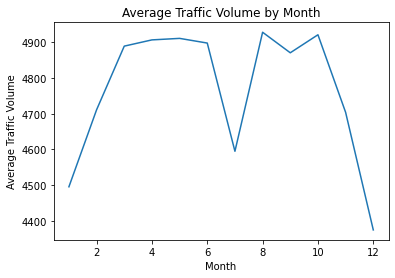

In [11]:
daytime['month'] = daytime['date_time'].dt.month
by_month = daytime.groupby('month').mean()
by_month['traffic_volume'].plot()
plt.title('Average Traffic Volume by Month')
plt.xlabel('Month')
plt.ylabel('Average Traffic Volume')
plt.show()

It looks like traffic volumes drop significantly during December and January, this could be due to cold weather and snow that's characteristic of Minnesota. It's interesting to note that there's a drop off in traffic volume in July too! 

Text(0.5, 1.0, 'Avg Traffic Volume by Day of Week')

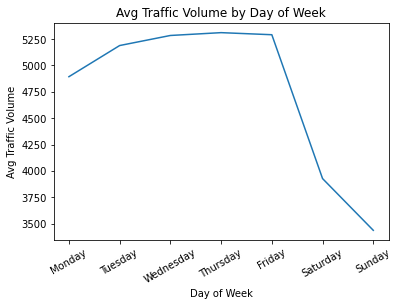

In [12]:
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek
by_dayofweek = daytime.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot()
plt.xlabel('Day of Week')
plt.ylabel('Avg Traffic Volume')
plt.xticks(ticks=[0,1,2,3,4,5,6],
           labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
           rotation=30)
plt.title('Avg Traffic Volume by Day of Week')

It looks like there's generally less traffic over the weekend compared to week days. 

## Traffic Volumes by Time of Day: Weekend vs Weekday

Next, let's try to find the busiest times of the day to be on I-94. Since there's a significant difference in traffic during the week compared to weekends, we'll seperate the data and then look at the average traffic volume accross day time hours.

In [13]:
daytime['hour'] = daytime['date_time'].dt.hour
bussiness_days = daytime.copy()[daytime['dayofweek'] <= 4] # 4 == Friday
weekend = daytime.copy()[daytime['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


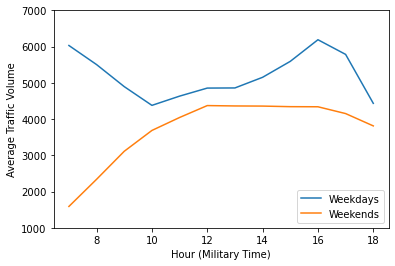

In [14]:

by_hour_business['traffic_volume'].plot(label='Weekdays')
by_hour_weekend['traffic_volume'].plot(label='Weekends')
plt.legend()
plt.ylabel('Average Traffic Volume')
plt.xlabel('Hour (Military Time)')
plt.ylim([1000,7000])
plt.show()

According to our graph, the busiest times during weekdays are 7am and 4pm. The graph also shows us that, during daytime hours, weekday traffic is always heavier compared to weekends. For weekends, there is substantially less people driving during early morning hours, and in the afternoon there is a consistant volume of traffic on average. 

## Traffic Volumes and Weather

Next, let's find the correlation between traffic volumes and weather patterns. The data set provides a few columns that measure weather like : `temp`, `rain_1h`, `snow_1h`, and `clouds_all`

We'll use `Dataframe.corr()` to find the correlation coefficients between traffic volume and these numeric variables that measure weather patterns.

In [15]:
daytime.corr()[['traffic_volume']]

,traffic_volume
temp,0.128317
rain_1h,0.003697
snow_1h,0.001265
clouds_all,-0.032932
traffic_volume,1.000000
month,-0.022337
dayofweek,-0.416453
hour,0.172704


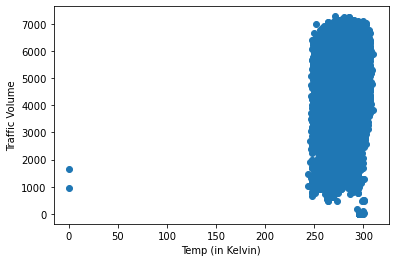

In [16]:
plt.scatter(daytime['temp'], daytime['traffic_volume'])
plt.ylabel('Traffic Volume')
plt.xlabel('Temp (in Kelvin)')
plt.show()

It looks like we may have some outliers recorded at 0 degrees Kelvin, also known as absolute zero, which is not possible. Let's drop these points and reassess the correlation coefficient.

In [17]:
daytime['temp'].describe()

count    23877.000000
mean       282.257596
std         13.298885
min          0.000000
25%        272.680000
50%        283.780000
75%        293.440000
max        310.070000
Name: temp, dtype: float64

As we can see, the min temp is 0. This must be an error in recording. So we'll update our dataframe to only include the rows where `temp` is greater than 0

In [18]:
daytime=daytime.loc[daytime['temp']>0]
daytime['temp'].describe()

count    23875.000000
mean       282.281240
std         13.046089
min        243.390000
25%        272.680000
50%        283.780000
75%        293.440000
max        310.070000
Name: temp, dtype: float64

It looks like there were two rows with this error, let's check our correlation coefficients again. 

In [19]:
daytime.corr()[['traffic_volume']]

,traffic_volume
temp,0.125536
rain_1h,0.003696
snow_1h,0.001259
clouds_all,-0.033295
traffic_volume,1.000000
month,-0.022673
dayofweek,-0.416275
hour,0.172429


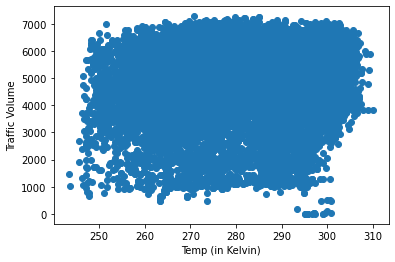

In [20]:
plt.scatter(daytime['temp'],daytime['traffic_volume'])
plt.xlabel('Temp (in Kelvin)')
plt.ylabel('Traffic Volume')
plt.show()

Judging by the correlation coefficients and our scatter plot, there is a weak positive correlation between traffic volumes and temperature. This means as temperature goes up, there's more traffic, but compared to other variables like `dayofweek`, it's not as clear of a relationship. 

Accross all weather variables, temperature has the strongest correlation with traffic volume. And given the correlation is fairly weak overall, the weather columns don't seem like reliable indicators for heavy traffic.

## Categorical Weather Columns

Our data set also includes non-numeric information about weather patterns. Let's see if there is any connection between traffic volume and `weather_main` or `weather_description`. We'll use a similar strategy - grouping by weather patterns and calculating the mean traffic volumes - as we did with the day and hour.   

In [21]:
#here, we're grouping all data points by weather patterns and descriptions
#and then using the .mean() function to aggregate the data.
by_weather_main = daytime.groupby('weather_main').mean()
by_weather_description = daytime.groupby('weather_description').mean()

by_weather_main

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,dayofweek,hour
weather_main,,,,,,,,
Clear,283.910932,0.000000,0.000000,1.670846,4779.622257,6.492163,3.137931,12.405956
Clouds,282.929274,0.000000,0.000000,62.667548,4865.415996,6.393243,3.005631,12.911974
Drizzle,284.456433,0.170804,0.000000,84.704417,4837.212911,7.105323,2.934315,12.308041
Fog,277.579641,0.163840,0.001409,65.477901,4372.491713,6.646409,2.798343,10.325967
Haze,275.319353,0.040036,0.000000,64.000000,4609.893285,5.832134,2.754197,12.467626
Mist,279.420825,0.249992,0.000825,74.961435,4623.976475,6.734285,2.895102,11.078288
Rain,287.089601,3.972943,0.000292,75.870116,4815.568462,6.774023,2.914467,12.642379
Smoke,292.405833,0.878333,0.000000,53.333333,4564.583333,6.833333,2.416667,13.166667
Snow,267.984505,0.014017,0.001768,80.501376,4396.321183,6.374828,2.750344,12.153370


In [22]:
by_weather_description.head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,dayofweek,hour
weather_description,,,,,,,,
SQUALLS,296.730000,1.020000,0.0,75.000000,4211.000000,7.000000,2.000000,14.000000
Sky is Clear,293.232549,0.000000,0.0,0.000000,4919.009390,7.557512,2.895540,12.453052
broken clouds,282.372927,0.000000,0.0,72.635875,4824.130326,6.675260,2.998210,12.811314
drizzle,283.573777,0.145072,0.0,88.589928,4737.330935,7.244604,3.028777,11.697842
few clouds,284.272965,0.000000,0.0,19.391951,4839.818023,6.159230,2.977253,12.633421


Next, let's use the aggregate data and create bar plots to see if any particular weather pattern is connected to heavy traffic volumes.

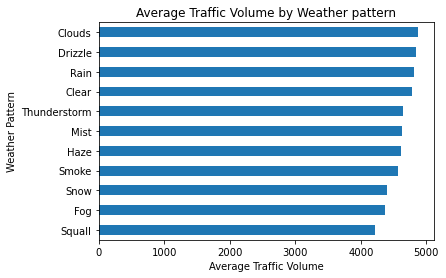

In [23]:
by_weather_main['traffic_volume'].sort_values().plot.barh()
plt.ylabel('Weather Pattern')
plt.xlabel('Average Traffic Volume')
plt.title('Average Traffic Volume by Weather pattern')
plt.show()

Keep in mind, the average traffic volume accross all weekday day time traffic (the data we're working with) is 4762 cars/hour. Looking at the bar plot above, there doesn't seem to be any weather that drastically deviates from that mean. 

Let's see if there are any patterns when we look at the data grouped by `weather_description`, which is more nuanced than `weather_main`.

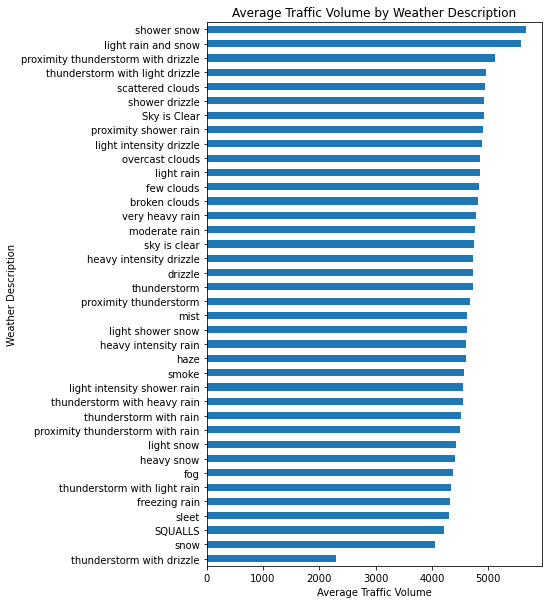

In [24]:
by_weather_description['traffic_volume'].sort_values().plot.barh(figsize=(6,10))
plt.ylabel('Weather Description')

plt.xlabel('Average Traffic Volume')
plt.title('Average Traffic Volume by Weather Description')
plt.show()

In [25]:
#including this list of mean traffic volumes for reference
by_weather_description[['traffic_volume']].sort_values(by=['traffic_volume'], ascending=False)

,traffic_volume
weather_description,
shower snow,5664.000000
light rain and snow,5579.750000
proximity thunderstorm with drizzle,5121.833333
thunderstorm with light drizzle,4960.000000
scattered clouds,4936.787712
shower drizzle,4932.666667
Sky is Clear,4919.009390
proximity shower rain,4901.756757
light intensity drizzle,4890.164049


It seems like we get some more informing patterns when we group the data by weather description. We find three descriptions where traffic volume is above 5,000 cars/hour: shower snow, light rain and snow, and proximity thunderstorm with drizzle. However we also see 'thunderstorm with drizzle', 'snow', 'heavy snow', 'light snow', and 'freezing rain' with traffic volumes below the overall weekday daytime mean traffic volume of 4762 cars/hour. 

Given this inconsistency, I wouldn't say that any weather pattern is a clear indicator of heavy traffic. 

## Conclusion

In this project, we were looking for clear indicators of heavy traffic for I-94. The only clear indicators of heavy traffic seem to be:

 - Weekdays
 - Month (March, April, May, June, August, September, October saw the heaviest traffic)
 - Time of day (Weekdays 7am and 4pm are 'rush hour')
 
If we look back at our correlation coefficients, we can see there is relatively strong correlation between `traffic_volume` and `dayofweek` (-.41). With the other columns `month` and `hour`, the correlation coeffecients aren't as strong because the traffic volume doesn't necessarily increase linearly, but we do see a clear pattern when we analyze the graphs. It seems like intense weather may increase traffic or decrease traffic, the pattern isn't clear enough to draw a conclusion given the inconsistencies in our data.